In [7]:
from keras.datasets import mnist
from keras.models import load_model

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(f'x_train.shape:{x_train.shape}')
print(f'x_test.shape:{x_test.shape}')
print(f'y_test.shape:{y_test.shape}')
print(f'y_train.shape:{y_train.shape}')

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
y_test.shape:(10000,)
y_train.shape:(60000,)


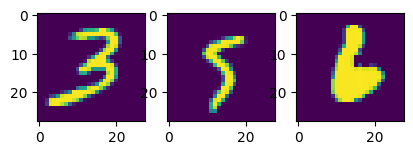

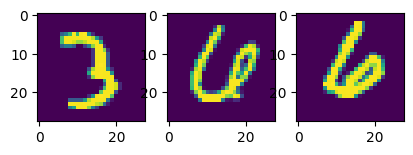

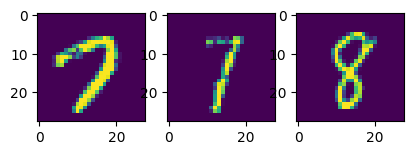

In [10]:
import matplotlib.pyplot as plt
import random

for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)])
    plt.show()

In [11]:
x_train_vec = x_train.reshape((60000,28,28,1))
x_test_vec = x_test.reshape((10000,28,28,1))

print(f'x_train.shape:{x_train.shape}')
print(f'x_test.shape:{x_test.shape}')

print(f'x_train_vec.shape:{x_train.shape}')
print(f'x_test_vec.shape:{x_test.shape}')

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
x_train_vec.shape:(60000, 28, 28)
x_test_vec.shape:(10000, 28, 28)


In [24]:
print(y_train)

[5 0 4 ... 5 6 8]


In [12]:
import numpy as np 

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f'y_train_vec.shape:{y_train_vec.shape}')

y_train_vec.shape:(60000, 10)


색은 RGB 0 1 2
[1:] = 0 - > 1 2 = 0 

In [13]:
print(y_train[0])

5


In [14]:
print(y_train_vec[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
for x in x_train[2]:
    for i in x:
        print('{:3}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67232 39  0  0  0  0  0
  0  0  0  0 62 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0120180 39  0  0  0  0  0
  0  0  0  0126163  0  0  0  0  0  0  0  0  0  0  0  0  0  2153210 40  0  0  0  0  0
  0  0  0  0220163  0  0  0  0  0  0  0  0  0  0  0  0  0 27254162  0  0  0  0  0  0
  0  0  0  0222163  0  0  0  0  0  0  0  0  0  0  0  0  0183254125  0  0  0  0  0  0
  0  0  0 46245163  0  0  0  0  0  0  0  0  0  0  0  0  0198254 56  0  0  0  0  0  0
  0  0  0120254163  0  0  0  0  0  0  0  0  0  0  0  0 23231254 2

In [16]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[train_indices, :, :, :]
y_valid_vec = y_train_vec[train_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :]

In [17]:
rand_indices

array([ 1133, 31597, 51712, ...,   146, 38091, 24396])

In [18]:
x_valid_vec.shape

(50000, 28, 28, 1)

In [19]:
x_train_vec.shape

(50000, 28, 28, 1)

In [22]:
y_train_vec.shape

(50000, 10)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu',
                  input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [117]:
history = model.fit(x_train_vec, y_train_vec, 
          batch_size=128,
          epochs=100,
          validation_data=(x_valid_vec, y_valid_vec))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9999 - loss: 3.0714e-04 - val_accuracy: 1.0000 - val_loss: 4.3644e-05
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 8.5762e-05 - val_accuracy: 1.0000 - val_loss: 5.9402e-05
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 6.7457e-05 - val_accuracy: 1.0000 - val_loss: 3.2841e-05
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 5.7663e-05 - val_accuracy: 1.0000 - val_loss: 4.5383e-05
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 4.8461e-05 - val_accuracy: 1.0000 - val_loss: 3.1543e-05
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 3.7404e-05 - val_accuracy: 1.0000 - val_loss: 5.3553e-05
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 2.6249e-05 - val_accuracy: 1.0000 - val_loss: 1.2537e-05
Epoch 8/100
391/391 ━━━━━━━━━━━━━━

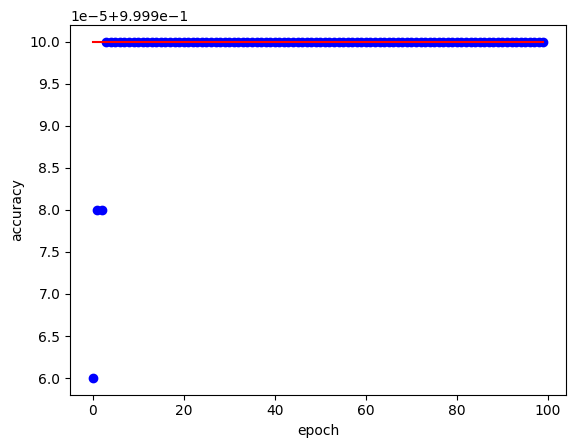

In [120]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train_acc')
plt.plot(epoch, valid_acc, 'red', label='valid_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [121]:
epoch

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [123]:

r = model.evaluate(x_test_vec, y_test_vec)

print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.1800
Loss = 0.1385682225227356
Accuracy = 0.9854999780654907


In [124]:

model.save('mnist984.keras')